# Instructions
[link](https://www.geog.leeds.ac.uk/courses/computing/study/core-python-phd/assessment2/wind.html)

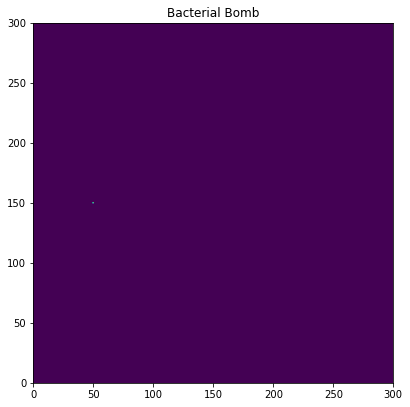

Starting location of the bacterial bomb x= 50 y= 150


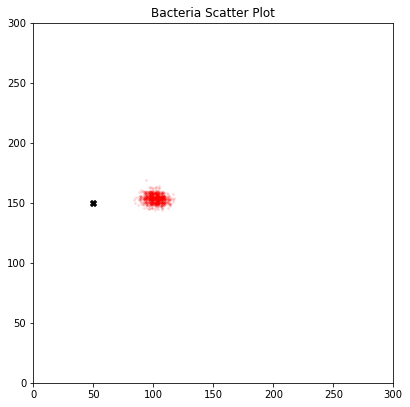

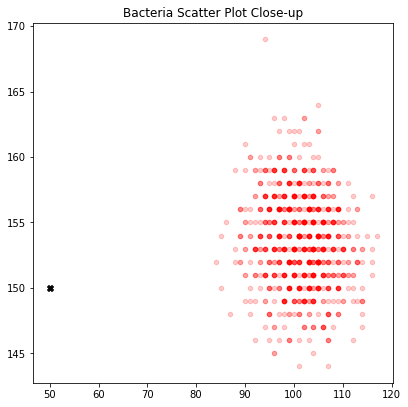

True

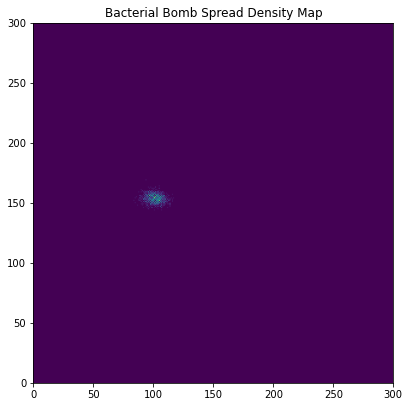

In [45]:
# -*- coding: utf-8 -*-
"""
Created on Sat Nov 28 09:41:53 2020

@author: Mushtahid
"""
%matplotlib inline
import matplotlib.pyplot as plt
import csv
import random
random.seed(10)
import ipywidgets

bact = []
fin_param = [] # To compare and also store time      
no_bact = 1000
no_iter = 1000000000

def news_move (a):
    if 0 < random.random() <= 0.05:
        a[1] -= 1 # Blow west
    elif 0.05 < random.random() <= 0.15:
        a[1] += 1 # Blow north
    elif 0.15 < random.random() <= 0.25:
        a[0] -= 1 # Blow south
    else: #0.25 < rand <= 1
        a[0] += 1 # Blow east

def ud_move(a):
    if random.random() <= 0.1:
        a[2] = bact[i][2] # Stay the same
        
    elif 0.1 < random.random() <= 0.3:
        a[2] += 1 # Rise by 1 metre/second
    
    else: #if 0.3 < rand <= 1
        a[2] -= 1 # Fall by 1 metre/second

map = []
with open('wind.raster', newline='') as f:
    map_r = csv.reader(f, quoting=csv.QUOTE_NONNUMERIC)
    for row in map_r:
        map_list = []
        for value in row:
            map_list.append(value)
        map.append(map_list)
        
fig = plt.figure(figsize=(5, 5))    
ax = fig.add_axes([0, 0, 1, 1])
plt.title('Bacterial Bomb')
plt.ylim(0, 300)
plt.xlim(0, 300)
plt.imshow(map);
plt.show()

for i in range(len(map)):
    for j in range (len(map[i])):
        if map[i][j] > 0:
            x0 = j
            y0 = i
print('Starting location of the bacterial bomb', 'x=', x0, 'y=', y0)
z0 = 75

for i in range(no_bact):
    bact.append([x0, y0, z0])
# print(bact)
       
for i in range(no_bact):
    ground = False
    for j in range(no_iter): # 1 iteration = 1 second
   
        if bact[i][2] >= z0: #above the building height         
            ud_move(bact[i])
            news_move(bact[i])
        
        elif 0 < bact[i][2] < z0:
            bact[i][2] -= 1 # Fall by 1 metre/second           
            news_move(bact[i])
        
        else: # if bact[i][2] = 0:   
            bact[i][2] = bact[i][2]
            ground = True
            break # Break and continue to next bacteria!
    
    if ground == True:
        t = j # Time
        xf = bact[i][0] # Final coordinates
        yf = bact[i][1]
        zf = bact[i][2] # To see if working properly
        fin_param.append([i, j, xf, yf, zf]) # Not needed actually
        continue
# print(fin_param)

fig = plt.figure(figsize=(5, 5))    
ax = fig.add_axes([0, 0, 1, 1])
plt.title('Bacteria Scatter Plot')
plt.ylim(0, 300)
plt.xlim(0, 300)
plt.scatter(x0,y0, marker='X',color='black')
for i in range(no_bact):
    plt.scatter(bact[i][0], bact[i][1], s=3, color='red', alpha=0.1)
plt.show()

fig = plt.figure(figsize=(5, 5))    
ax = fig.add_axes([0, 0, 1, 1])
plt.title('Bacteria Scatter Plot Close-up')
# plt.ylim(0, 300)
# plt.xlim(0, 300)
plt.scatter(x0,y0, marker='X',color='black')
for i in range(no_bact):
    plt.scatter(bact[i][0], bact[i][1], s=20, color='red', alpha=0.2)
plt.show()

# plt.title('Bacteria Density Map 3')
# # plt.ylim(0, 300)
# # plt.xlim(0, 300)
# for i in range(no_bact):
#     plt.scatter(bact[i][0], bact[i][1], s=20, color='red', alpha=0.1)
# plt.show()

# plt.title('Bacteria Density Map 4')
# # plt.ylim(0, 300)
# # plt.xlim(0, 300)
# for i in range(no_bact):
#     plt.scatter(fin_param[i][2], fin_param[i][3], s=20, color='red', alpha=0.1)
# plt.show()

# Create density map
den_map = []
for i in range(300):
    dm2 = []
    for j in range(300):
        dm2.append(0)
    den_map.append(dm2)
    
# print(den_map)
# print(len(den_map))
# print(len(den_map[0]))

for i in range(len(bact)):
    x = bact[i][0]
    y = bact[i][1]
    den_map[y][x] += 1
# print(den_map)

fig = plt.figure(figsize=(5, 5))    
ax = fig.add_axes([0, 0, 1, 1])
plt.title('Bacterial Bomb Spread Density Map')
plt.ylim(0, 300)
plt.xlim(0, 300)
plt.imshow(den_map);

# Save bacterial spread density map as a csv file
with open('bac_den_map.csv', 'w', newline='') as f:     
   den_m_w = csv.writer(f)     
   for row in den_map:         
        den_m_w.writerow(row)
        
# Read the saved map to compare
d2 = []
with open('bac_den_map.csv', newline='') as f:
    d2_r = csv.reader(f, quoting=csv.QUOTE_NONNUMERIC)
    for row in d2_r:
        dm2 = []
        for value in row:
            dm2.append(value)
        d2.append(dm2)
# print('Death2', d2)
# print(len(d2))
# print(len(d2[0]))



In [47]:
print(den_map == d2)

True
